In [ ]:
import os
import cv2
from PIL import Image
from glob import glob
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras import layers
import matplotlib.pyplot as plt


In [ ]:
def convert_video_to_images(img_folder, filename='assignment3_video.avi'):

  """
    Converts the video file (assignment3_video.avi) to JPEG images.
    Once the video has been converted to images, then this function doesn't
    need to be run again.
    Arguments
    ---------
    filename    : (string) file name (absolute or relative path) of video file.
    img_folder  : (string) folder where the video frames will be stored
"""

  try:
    if not os.path.exists(img_folder):
      os.makedirs(img_folder)
  except OSError:
    print('Error')
  # Make sure that the abscense/prescence of path
  # separator doesn't throw an error.
  img_folder = f'{img_folder.rstrip(os.path.sep)}{os.path.sep}'
  # Instantiate the video object.
  video = cv2.VideoCapture(filename)

  i= 0
  while video.isOpened():
    ret, frame = video.read()
    if ret:
      im_fname = f'{img_folder}frame{i:0>4}.jpg'
      print('Captured...', im_fname)
      cv2.imwrite(im_fname, frame)
      i += 1
    else:
      break
  video.release()
  cv2.destroyAllWindows()

  if i:
    print(f'Video converted\n{i} images written to {img_folder}')

convert_video_to_images("img_folder", filename='assignment3_video.avi')


Captured... img_folder/frame0000.jpg
Captured... img_folder/frame0001.jpg
Captured... img_folder/frame0002.jpg
Captured... img_folder/frame0003.jpg
Captured... img_folder/frame0004.jpg
Captured... img_folder/frame0005.jpg
Captured... img_folder/frame0006.jpg
Captured... img_folder/frame0007.jpg
Captured... img_folder/frame0008.jpg
Captured... img_folder/frame0009.jpg
Captured... img_folder/frame0010.jpg
Captured... img_folder/frame0011.jpg
Captured... img_folder/frame0012.jpg
Captured... img_folder/frame0013.jpg
Captured... img_folder/frame0014.jpg
Captured... img_folder/frame0015.jpg
Captured... img_folder/frame0016.jpg
Captured... img_folder/frame0017.jpg
Captured... img_folder/frame0018.jpg
Captured... img_folder/frame0019.jpg
Captured... img_folder/frame0020.jpg
Captured... img_folder/frame0021.jpg
Captured... img_folder/frame0022.jpg
Captured... img_folder/frame0023.jpg
Captured... img_folder/frame0024.jpg
Captured... img_folder/frame0025.jpg
Captured... img_folder/frame0026.jpg
C

In [ ]:
def load_images(img_dir, im_width=60, im_height=44):
    """
    Reads, resizes, and normalizes the extracted image frames from a folder.
    The images are returned both as a Numpy array of flattened images
    (i.e., the images with the 3-d shape (im_width, im_height, num_channels)
    are reshaped into the 1-d shape (im_width x im_height x num_channels))
    and a list with the images with their original number of dimensions
    suitable for display.

    Arguments
    ---------
    img_dir   : (string) the directory where the images are stored.
    im_width  : (int) The desired width of the image.
                      The default value works well.
    im_height : (int) The desired height of the image.
                      The default value works well.

    Returns
    -------
    X : (numpy.array) An array of the flattened images.
    images : (list) A list of the resized images.
    """
    images = []
    fnames = glob(f'{img_dir}{os.path.sep}frame*.jpg')
    fnames.sort()
    for fname in fnames:
        im = Image.open(fname)
        # resize the image to im_width and im_height.
        im_array = np.array(im.resize((im_width, im_height)))
        # Convert uint8 to decimal and normalize to 0 - 1.
        images.append(im_array.astype(np.float32) / 255.)
        # Close the PIL image once converted and stored.
        im.close()

    # Flatten the images to a single vector
    X = np.array(images).reshape(-1, np.prod(images[0].shape))
    return X, images


X, images = load_images("img_folder", im_width=60, im_height=44)

In [ ]:
def build_cnn_autoencoder(input_shape):
  input_layer = keras.Input(shape=input_shape)

  x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
  x = layers.UpSampling2D((2, 2))(x)
  x = layers.Conv2D(16, (3, 3), activation='relu')(x)
  x = layers.UpSampling2D((2, 2))(x)
  decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

  autoencoder = keras.Model(input_layer, decoded)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  return autoencoder

In [ ]:
# Reshape X to (num_samples, im_height, im_width, num_channels)
X = X.reshape(-1, 44, 60, 3)

X_test,X_train = train_test_split(X,test_size=0.2,random_state=42)

# Build and train the CNN autoencoder
input_shape = X_test.shape[1:]
cnn_autoencoder = build_cnn_autoencoder(input_shape)
cnn_autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
7/7 [==============================] - 7s 472ms/step - loss: 0.6834 - val_loss: 0.6667
Epoch 2/50
7/7 [==============================] - 4s 614ms/step - loss: 0.6493 - val_loss: 0.6242
Epoch 3/50
7/7 [==============================] - 4s 681ms/step - loss: 0.6076 - val_loss: 0.5823
Epoch 4/50
7/7 [==============================] - 3s 452ms/step - loss: 0.5652 - val_loss: 0.5450
Epoch 5/50
7/7 [==============================] - 2s 369ms/step - loss: 0.5378 - val_loss: 0.5326
Epoch 6/50
7/7 [==============================] - 2s 366ms/step - loss: 0.5294 - val_loss: 0.5267
Epoch 7/50
7/7 [==============================] - 2s 365ms/step - loss: 0.5254 - val_loss: 0.5257
Epoch 8/50
7/7 [==============================] - 4s 584ms/step - loss: 0.5245 - val_loss: 0.5241
Epoch 9/50
7/7 [==============================] - 5s 696ms/step - loss: 0.5230 - val_loss: 0.5230
Epoch 10/50
7/7 [==============================] - 3s 464ms/step - loss: 0.5220 - val_loss: 0.5220
Epoch 11/50
7/7 [==

1/1 [==============================] - 0s 41ms/step


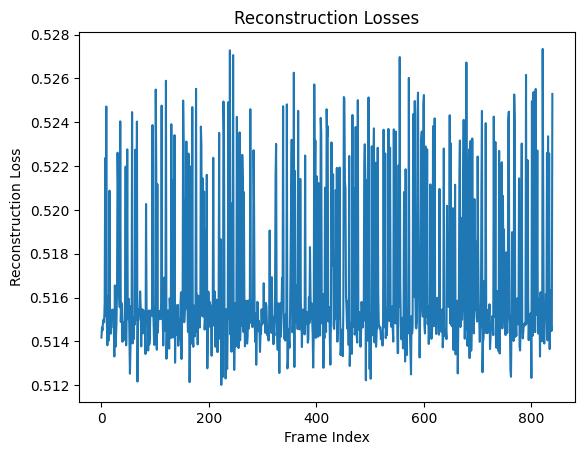

In [ ]:
# Reshape testing set
X_test = X_test.reshape(-1, 44, 60, 3)

# Calculate reconstruction losses for each frame in the testing set
reconstruction_losses = []
for frame in X_test:
    frame = frame.reshape((1,) + frame.shape)
    reconstruction = cnn_autoencoder.predict(frame)
    loss = cnn_autoencoder.evaluate(frame, frame, verbose=0)
    reconstruction_losses.append(loss)

# Plot the reconstruction losses
plt.plot(reconstruction_losses)
plt.title('Reconstruction Losses')
plt.xlabel('Frame Index')
plt.ylabel('Reconstruction Loss')
plt.show()

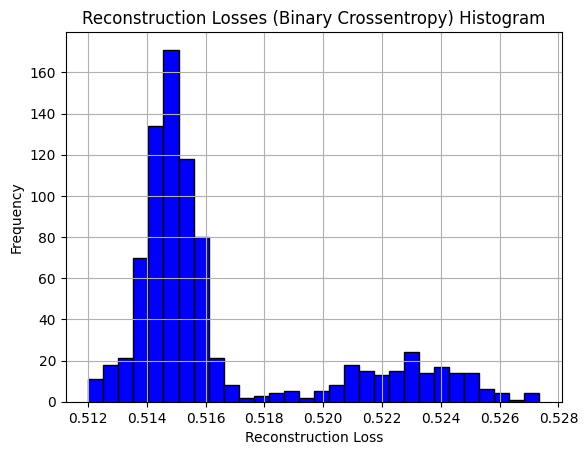

In [ ]:
plt.hist(reconstruction_losses, bins=30, color='blue', edgecolor='black')
plt.title('Reconstruction Losses (Binary Crossentropy) Histogram')
plt.xlabel('Reconstruction Loss')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
def predict(frame):
    threshold = np.percentile(reconstruction_losses,75)
    frame = frame.reshape((1,) + frame.shape)
    reconstruction = cnn_autoencoder.predict(frame)
    loss = cnn_autoencoder.evaluate(frame, frame, verbose=0)
    return loss > threshold

# Example usage
result = predict(X[721])
print(result)

1/1 [==============================] - 0s 49ms/step
True
